## Final Project Submission - Module 02


* Student name: Maria Antonietta Ricci
* Student pace: self paced 
* Instructor name: Jeff
* Blog post URL: https://datastorytell.wordpress.com/2022/05/17/thomas-bayes-his-time-his-theorem/


# Business Problem
This analysis aims to establish how home renovations might increase the estimated value of their homes, and by what amount.
Stakeholders who could benefit having this information are private homeowners, investors, renovators and real estate agencies and buyers as well.
Renovating a house can be considered an interesting alternative when it comes to acquire a property in the real estate market.
It can constitute, among other advantages, a lucrative purchase as, after renovation, the property can be sold at a higher price, with a relative important profitable margin.

## Hypothesis 1

Y(price) = Bo + B1(renovation) + e1


If B1 is positive, Y increases.
If B1 is negative, Y decreases.
If B1 is = 0, no effect.
If B1 != 0, effect = H1.

H1: Price is impacted by House Renovation.


if B1 = 0, no effect = H0 

H0: Price is not impacted by House Renovation.




In [1]:
# Installing needed libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset chosen for this analysis: King County House Sales 

In [2]:
# Importing and reading dataset 
os.chdir("/Users/mariaantoniettaricci/DSC/Module_02/Final_Project/dsc-phase-2-project/data/")
kc_house = pd.read_csv("kc_house_data.csv")
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Cleaning the dataset
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

By all means this is indeed a very large dataset: 21957 entries, 21 columns.

In [4]:
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Description of the labels as follows:

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Some considerations about the columns:
- further research: trend has a seasonal/time base, geographical base
- difference between the grading and King County evaluation system
- correlation between yr_built and yr_renovation, and condition 
- which features impact the price according to the data
- predicting model for the price

In [5]:
#Rename the columns in order to make them more clear and intuitive
kc_house.rename(columns ={"date": "sell date", "grade": "WSS grade"})

,id,sell date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,WSS grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
#Checking for missing values
kc_house.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Looking at the dataset, some considerations emerge:

- Three columns appear to have missing values in form of nan and "?":
    - Column "view": how many times the house (or the postings?) has been viewed. This column seem to be not relevant for the purpose of this study so I decided drop it with a certain degree of confidence.
    - The other two columns evaluation is more complex as: Column "waterfront" and  Column "yr_renovated" is a feature that impacts the value of a house.
    I can't really use the data that don't have this information,though.

- What is the relationship between the columns sqft_living and sqft_above and sqft_basement? checking the data I noticed there is redundant information.

_ What is the relationship among the condition, and grade in case, and yr_renovated? 



In [7]:
kc_house.drop(["view"], axis=1, inplace = True)

In [8]:
kc_house.dropna(inplace= True)
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [9]:
kc_house.drop(index=kc_house[kc_house['sqft_basement'] == "?"].index, inplace=True)
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [10]:
#Adjusting the data types in order to be able to work on them effectively. 
#object: id,date,waterfront,built,renovated,zipcode
#float:price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement, 
# lat,lon,l15,t15 
kc_house[['id', 'date',"yr_built", "yr_renovated"]] = kc_house[['id', 'date',"yr_built", "yr_renovated"]].astype(str)
kc_house[["price","bedrooms","bathrooms", "sqft_living","sqft_lot","waterfront", "zipcode","floors","condition","grade","sqft_above","sqft_basement","lat","long","sqft_living15", "sqft_lot15"]] =kc_house[["price","bedrooms","bathrooms", "sqft_living","sqft_lot","waterfront","zipcode","floors","condition", "grade", "sqft_above", "sqft_basement" ,"lat", "long", "sqft_living15", "sqft_lot15"]].astype(float)

In [11]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15474 non-null  object 
 1   date           15474 non-null  object 
 2   price          15474 non-null  float64
 3   bedrooms       15474 non-null  float64
 4   bathrooms      15474 non-null  float64
 5   sqft_living    15474 non-null  float64
 6   sqft_lot       15474 non-null  float64
 7   floors         15474 non-null  float64
 8   waterfront     15474 non-null  float64
 9   condition      15474 non-null  float64
 10  grade          15474 non-null  float64
 11  sqft_above     15474 non-null  float64
 12  sqft_basement  15474 non-null  float64
 13  yr_built       15474 non-null  object 
 14  yr_renovated   15474 non-null  object 
 15  zipcode        15474 non-null  float64
 16  lat            15474 non-null  float64
 17  long           15474 non-null  float64
 18  sqft_l

After cleaning, the  dataset is still pretty huge with 15474 entries and 19 columns, both numerical and categorical as the datatype indicates.



EDA & FEATURE ENGINEERING

In [12]:
kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.547400e+04,15474.000000,15474.000000,15474.000000,1.547400e+04,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000
mean,5.417604e+05,3.379088,2.121559,2086.045302,1.530465e+04,1.494378,0.007561,3.410883,7.664340,1793.719659,292.325643,98077.474086,47.559168,-122.213523,1991.138620,12875.651480
std,3.747690e+05,0.934149,0.767421,920.447871,4.206225e+04,0.538777,0.086628,0.651602,1.174345,829.280604,444.035651,53.458408,0.138773,0.140493,684.827288,27821.981031
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.200000e+05,3.000000,1.750000,1430.000000,5.057000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,98032.000000,47.469000,-122.328000,1490.000000,5100.250000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,0.000000,98065.000000,47.571000,-122.229000,1850.000000,7626.000000
75%,6.434758e+05,4.000000,2.500000,2550.000000,1.071375e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,98117.000000,47.677500,-122.124000,2370.000000,10107.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Checking max and min, I found some outliers. I exclude them based on the fact that they may not be considered the average single family house, shrinking the spectrum of potential stakeholders.
Houses with more than 5000 square feet are considering mansions.

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjG_pn134_3AhUOLDQIHSbiBVYQFnoECAQQAw&url=https%3A%2F%2Fwww.upnest.com%2F1%2Fpost%2Fwhat-is-a-mansion%2F&usg=AOvVaw1bEtkLfEA3ss_W4JxzmH1a

In [13]:
kc_house = kc_house.loc[kc_house["sqft_living"] < 5000.0]

In [14]:
kc_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,7.0,2170.0,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,7.0,1060.0,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,2414600126,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,7.0,1050.0,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,8.0,1180.0,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,8.0,1530.0,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,8.0,2310.0,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,7.0,1020.0,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0


Visualizing the dependent variable.

Text(0.5, 1.0, 'Distribution of Houses Prices')

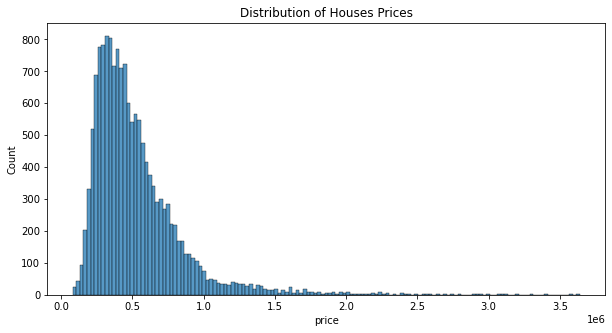

In [15]:
data = kc_house["price"]
ax = plt.figure(figsize=(10, 5))
sns.histplot(data = data)
plt.title('Distribution of Houses Prices')

Text(0.5, 1.0, 'Distribution of Houses Prices')

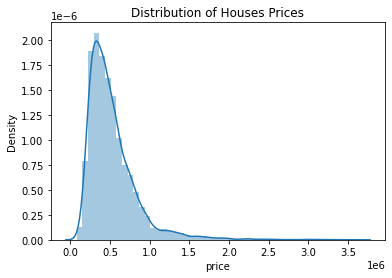

In [16]:
import seaborn as sns
import warnings
kch_price = kc_house["price"]
warnings.filterwarnings(action='ignore', category=FutureWarning)
sns.distplot(kch_price, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
plt.title('Distribution of Houses Prices')

In [17]:
data.describe()

count    1.532300e+04
mean     5.257012e+05
std      3.164254e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      3.640000e+06
Name: price, dtype: float64

The plot shows:

   - skeweness
    
   - kurtosis
    
   - non normally distributed

Checking again for other outliers calcutating z-values.

In [18]:
import scipy
from scipy import stats

In [19]:
# Calculating z scores and filtering the outliers (observations 3 std deviations away).
a = list(scipy.stats.zscore(kc_house["price"]))
a
kc_hs = kc_house.assign(pzs = a)
kc_hs = kc_hs[kc_hs["pzs"]<= 3]
kc_hs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pzs
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,2170.0,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,0.038869
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,1050.0,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,0.247456
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,1680.0,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-0.049622
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,...,1060.0,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,-0.739065
8,2414600126,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,...,1050.0,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,-0.936116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,...,1180.0,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0,-0.160236
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,...,1530.0,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-0.523683
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,...,2310.0,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-0.397267
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,...,1020.0,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-0.390627


Text(0.5, 1.0, 'Distribution of Houses Prices after outliers check')

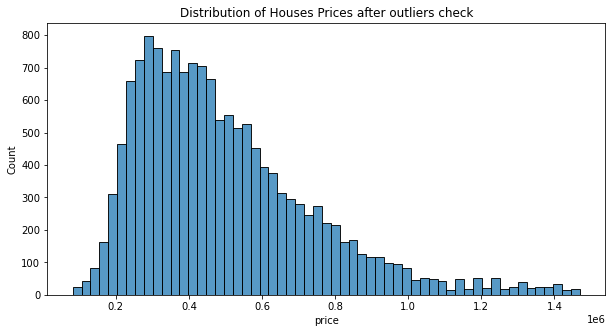

In [20]:
data= kc_hs["price"]
ax = plt.figure(figsize=(10, 5))
sns.histplot(data = data)
plt.title('Distribution of Houses Prices after outliers check')

Text(0.5, 1.0, 'Distribution of Houses Prices after outliers check')

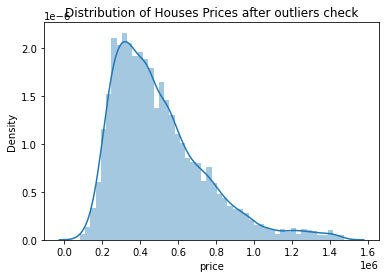

In [21]:
kch_price = kc_hs["price"]
warnings.filterwarnings(action='ignore', category=FutureWarning)
sns.distplot(kch_price, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
plt.title('Distribution of Houses Prices after outliers check')

It is definitely less positively skewed and the kurtosis is decreased as well. It is still not strictly bell shaped but it is good enough.

In [22]:
kc_hs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pzs
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,2170.0,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,0.038869
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,1050.0,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,0.247456
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,1680.0,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-0.049622
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,...,1060.0,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,-0.739065
8,2414600126,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,...,1050.0,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,-0.936116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,...,1180.0,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0,-0.160236
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,...,1530.0,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-0.523683
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,...,2310.0,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-0.397267
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,...,1020.0,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-0.390627


Considering the hypothesis, I proceed visualizing the data and check relationships between price and renovation. As stated in the business problem, this is the main relationship I'm especilly interested in.

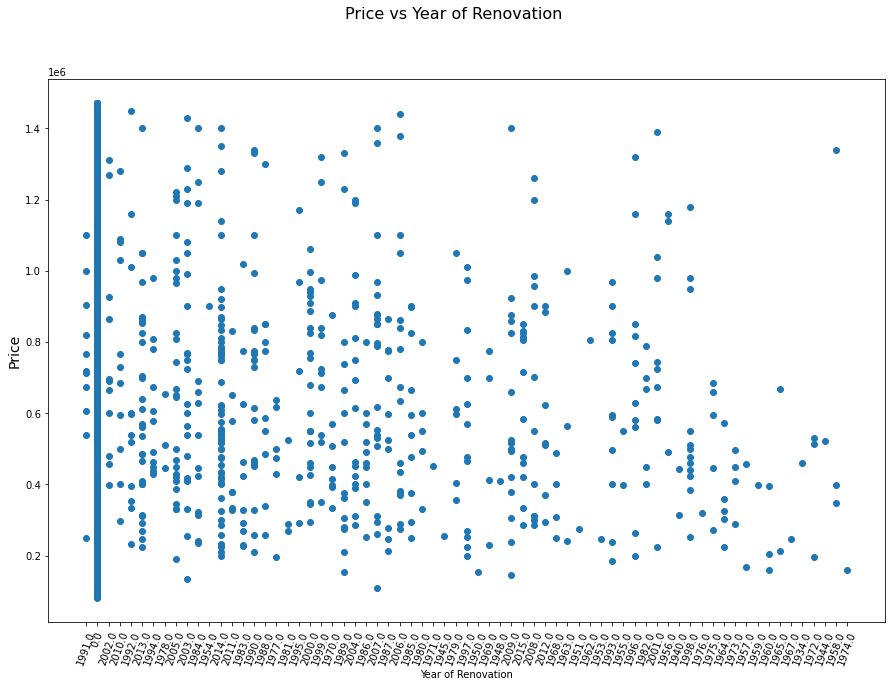

In [23]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Price vs Year of Renovation', fontsize=16)
plt.scatter(data = kc_hs, x = "yr_renovated", y = "price")
plt.xlabel('Year of Renovation', fontsize=10)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=70)
plt.show()

Considering how I formulated the hypothesis, the way the renovation information is presented is not usable.
I decided to convert the related categorical values in binary values.

In [24]:
# converting to binary data
kc_hs["renovation"] = kc_hs["yr_renovated"]
kc_hs


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pzs,renovation
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,0.038869,1991.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,0.247456,0.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-0.049622,0.0
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,...,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,-0.739065,0.0
8,2414600126,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,...,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,-0.936116,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,...,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0,-0.160236,0.0
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,...,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-0.523683,0.0
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,...,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-0.397267,0.0
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,...,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-0.390627,0.0


In [3]:
# The reason I chose the following code string instead of using the function get_dummies()
#is because it would have reversed the attribution of the dummy variables would be inverted, adding confusion 

In [25]:
kc_hs["renovation"] = np.where(kc_hs["renovation"] != "0.0", 1, 0)
kc_hs

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pzs,renovation
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,0.038869,1
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,0.247456,0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-0.049622,0
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,...,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,-0.739065,0
8,2414600126,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,...,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,-0.936116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,...,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0,-0.160236,0
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,...,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-0.523683,0
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,...,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-0.397267,0
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,...,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-0.390627,0


In [26]:
kcc_hss = kc_hs.copy()
kcc_hss

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pzs,renovation
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,0.038869,1
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,0.247456,0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-0.049622,0
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,...,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,-0.739065,0
8,2414600126,4/15/2015,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,...,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,-0.936116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,...,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0,-0.160236,0
21592,263000018,5/21/2014,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,...,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-0.523683,0
21593,6600060120,2/23/2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,...,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-0.397267,0
21594,1523300141,6/23/2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,...,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-0.390627,0


In [27]:
#Log Trasformation
kcc_hss["price"] = np.log(kcc_hss["price"])
kcc_hss

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pzs,renovation
1,6414100192,12/9/2014,13.195614,3.0,2.25,2570.0,7242.0,2.0,0.0,3.0,...,400.0,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,0.038869,1
3,2487200875,12/9/2014,13.311329,4.0,3.00,1960.0,5000.0,1.0,0.0,5.0,...,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,0.247456,0
4,1954400510,2/18/2015,13.142166,3.0,2.00,1680.0,8080.0,1.0,0.0,3.0,...,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,-0.049622,0
7,2008000270,1/15/2015,12.583995,3.0,1.50,1060.0,9711.0,1.0,0.0,3.0,...,0.0,1963,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,-0.739065,0
8,2414600126,4/15/2015,12.343658,3.0,1.00,1780.0,7470.0,1.0,0.0,3.0,...,730.0,1960,0.0,98146.0,47.5123,-122.337,1780.0,8113.0,-0.936116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,13.071070,3.0,2.50,1310.0,1294.0,2.0,0.0,3.0,...,130.0,2008,0.0,98116.0,47.5773,-122.409,1330.0,1265.0,-0.160236,0
21592,263000018,5/21/2014,12.793859,3.0,2.50,1530.0,1131.0,3.0,0.0,3.0,...,0.0,2009,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,-0.523683,0
21593,6600060120,2/23/2015,12.899220,4.0,2.50,2310.0,5813.0,2.0,0.0,3.0,...,0.0,2014,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,-0.397267,0
21594,1523300141,6/23/2014,12.904459,2.0,0.75,1020.0,1350.0,2.0,0.0,3.0,...,0.0,2009,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,-0.390627,0


Text(0.5, 1.0, 'Log Trasformation - Distribution of Houses Prices')

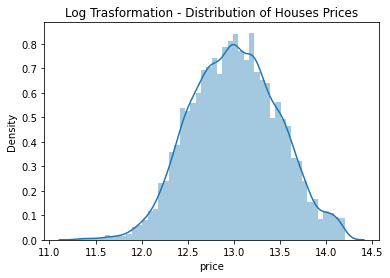

In [28]:
kcchs_price = kcc_hss["price"]
warnings.filterwarnings(action='ignore', category=FutureWarning)
sns.distplot(kcchs_price, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
plt.title("Log Trasformation - Distribution of Houses Prices")

In [29]:
kcc_hss10 = kcc_hss[["price", "renovation"]]
kcc_hss10



,price,renovation
1,13.195614,1
3,13.311329,0
4,13.142166,0
7,12.583995,0
8,12.343658,0
...,...,...
21591,13.071070,0
21592,12.793859,0
21593,12.899220,0
21594,12.904459,0


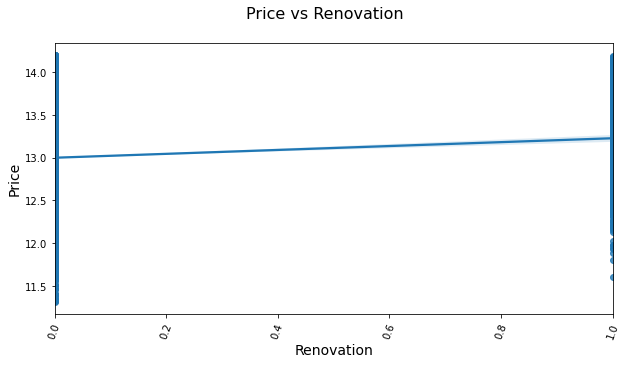

In [39]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Price vs Renovation', fontsize=16)
sns.regplot(x = "renovation", y = "price", data = kcc_hss10)
plt.xlabel('Renovation', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=70)
plt.show()

In [33]:
# Running the regression Ln(y(price))= b0 + b1(renovation) + e1
from statsmodels.formula.api import ols

In [34]:
outcome = 'price'
x_cols = ['renovation']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kcc_hss).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.67e-30
Time:                        23:13:26   Log-Likelihood:                -9966.4
No. Observations:               15029   AIC:                         1.994e+04
Df Residuals:                   15027   BIC:                         1.995e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9994      0.004   3326.869      0.000      12.992      13.007
renovation     0.2278      0.020     11.464      0.000       0.189       0.267
==============================================================================
Omnibus:                       48.812   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.703
Skew:                          -0.009   Prob(JB):                     6.50e-09
Kurtosis:                       2.755   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Considerations

- Categorical binary variable as independent.

- Log Transformation of the dependent variable. 


## Results 

H1: Price is strongly impacted by House Renovation.

H0: Price is not strongly impacted by House Renovation.

I'm using a very simple model:

xi = renovation

Yi(price) = B0 + B1xi + e1.

xi = 1 if renovation
     0 if no renovation 

Looking at the OLS results, not very useful to think of B1 as a slope parameter. Values are 0 and 1, not continous. 

The expected price increment when xi = 0, so when no renovation has been taken place.

E(Yi|xi = 0) = B0 + B1(0). 
             = B0
      
Ln Y^i(price) = 12.9994 %

The expected price increment when Di = 1, so when renovation has been taken place.


E(Yi|xi = 1) = B0 + B1(1).

Ln Y^(price) =12.9994% + 0.2278%


This means that a house that has been renovated command an increase of 0.23% on the price, on average, holding all the other variable costant.

### How much of the variation is explained by this results?
R-Squared is 0.009. 
This means that the 0.9% of the dependent variable Y, in this case price, is explained by the independent variable renovation.
Other features should be taken in consideration then.

### Is it statistically significant?

Checking the other results: 

- p-value is 0.0. 
    It is less than 0.05. This means that I have to reject the H0. I have to reject that renovation feature has no effect on the sale price.

- f-stats is 131.4. so f-stats > 0. It is possible to reject the H0 at 5% level of significance.
    
- t-value is 11.464 with p-value of O.O which seems to confirm the difference.
    




## Regression Assumptions
    
Being Boolean, dummy variables are not violating the OLS assumptions

## Further research 

In [35]:
corr_kch = kc_hs.corr().abs()

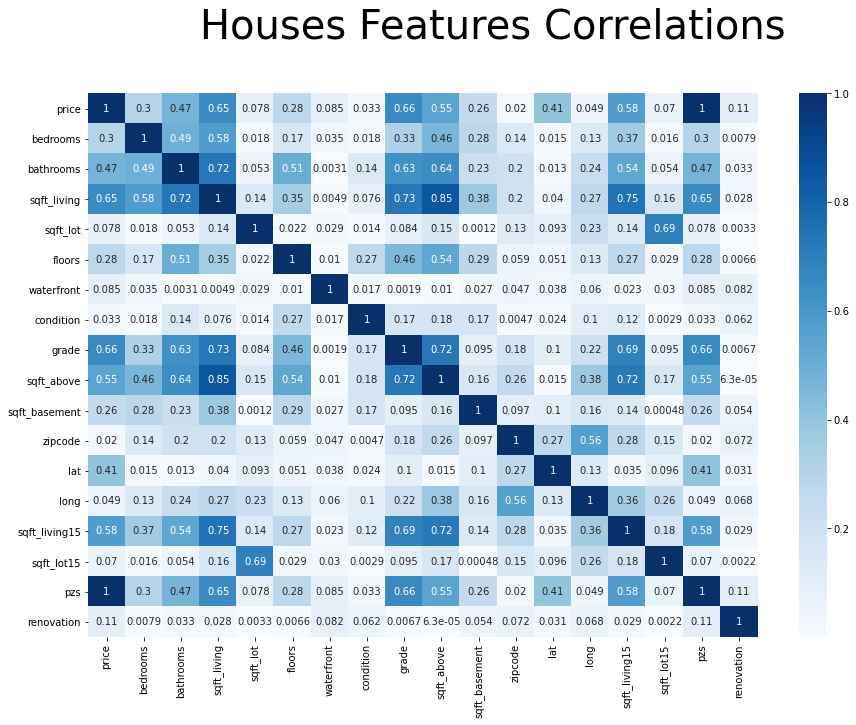

In [36]:
fig, ax=plt.subplots(figsize=(15,10))
fig.suptitle('Houses Features Correlations', fontsize=40, y=1.0)
heatmap = sns.heatmap(corr_kch, cmap='Blues', annot=True)

As it is noticeable the highest scores are related to the size and the condition of the units.

In [37]:
corr_pp = pd.DataFrame(corr_kch.loc[["bedrooms", "bathrooms","sqft_living","sqft_lot","floors","waterfront",
"condition",
"grade",
"sqft_above",
"sqft_basement",
"zipcode",
"sqft_living15",
"sqft_lot15"],"price"])
corr_pp

,price
bedrooms,0.301992
bathrooms,0.474145
sqft_living,0.648698
sqft_lot,0.077671
floors,0.277432
waterfront,0.084611
condition,0.032624
grade,0.656068
sqft_above,0.548846
sqft_basement,0.256584


#### Correlations Results 
Most strongly correlated features that are worthy of further investigations are:
- sqft_living
- grade
- sqft_living15
- bathrooms

## Conclusions
For all the stakeholders interested in knowing whether having a house renovated is a lucrative feature, the answer is that the renovation itself, even though it slighly increases the price, is not among the features that considerabily impact the price.
Other features are more likely to have a major influence on it such as the living square feet, the evaluation of the condition of the house as per the scale used in Washignton state, the number of bathrooms, and the comparison with other houses in same neighborhood in a 15 mile range. 
These latter should be deeper investigated.